<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 5: Gravimetrie
# Schweremodellierung
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import ipywidgets as widgets

In [2]:
# define profile
xmin  = -400.
xmax  = +400.
xstep = 101
tiny  = 1.e-10
x = np.linspace(xmin,xmax,xstep) + tiny

In [4]:
def boug_sphere(x,D=100.,R=50.,drho=500.):
    G    = 6.672e-11      # m^3/kg/s^2
    # Bouguer gravity of solid sphere
    boug = 4./3.*np.pi*G*drho * R**3*D/(x**2+D**2)**(3/2)
    return boug

## 2D Störung

Resultiert aus Überlagerung zweier horizontaler semi-infinite Platten ...

<img src=figures/sketch_fault.jpg style=width:10cm>

$$
g(x) = 2 G \Delta\rho T 
        \left\{
        \pi - \arctan\left[ {{x}\over{D_1}} + \cot{\alpha} \right]
            + \arctan\left[ {{x}\over{D_2}} + \cot{\alpha} \right]
        \right\}
$$

Wir betrachten zunächst die beiden Beiträge der semi-inifiniten Platten:

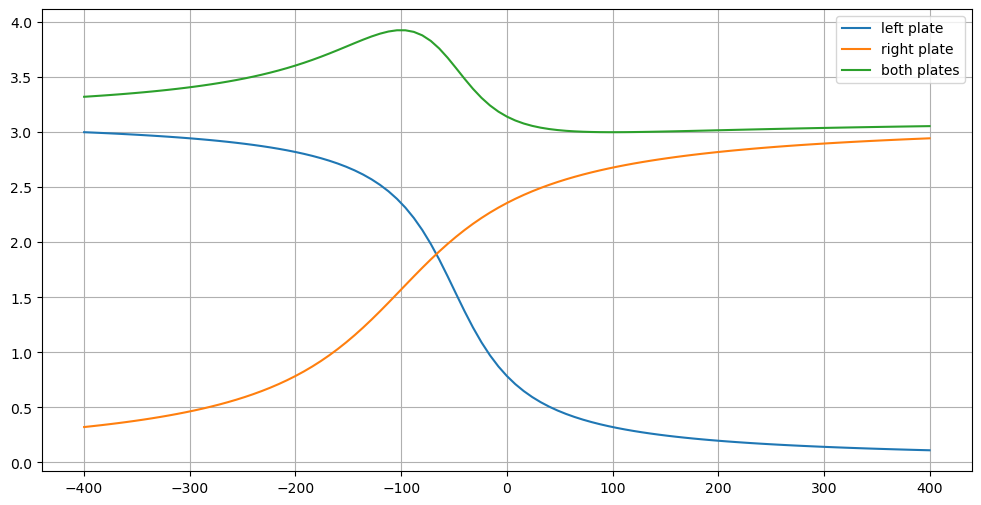

In [5]:
alpha  = 45.
D1     = 50
D2     = 100
d2r    = np.pi/180
yleft  = np.pi/2 - np.arctan((x/D1)+(1./np.tan(alpha*d2r)))
yright = np.pi/2 + np.arctan((x/D2)+(1./np.tan(alpha*d2r)))
plt.figure(figsize=(12,6))
plt.plot(x,yleft,label='left plate')
plt.plot(x,yright,label='right plate')
plt.plot(x,yleft+yright,label='both plates')
plt.grid()
plt.legend()

In [6]:
def boug_fault(x,drho=500.,D1=50.,D2=100.,T=50.,alpha=90.):
    # Bouguer gravity of fault
    G    = 6.672e-11      # m^3/kg/s^2
    d2r  = np.pi/180.
    boug = (2.*G*drho*T*(np.pi 
                         - np.arctan((x/D1)+(1./np.tan(alpha*d2r))) 
                         + np.arctan((x/D2)+(1./np.tan(alpha*d2r)))))
    #boug = boug - 2.*G*drho*T*np.pi        
    return boug

In [7]:
def geometry(icol,axs,D1,D2,T,alpha):
    pleft = np.zeros(10).reshape(5,2)
    pleft[0,0] = 0. - D1/np.tan(alpha*np.pi/180)
    pleft[1,0] = 0. - (D1+T)/np.tan(alpha*np.pi/180)
    pleft[2,0] = -500.
    pleft[3,0] = -500.
    pleft[4,0] = 0. - D1/np.tan(alpha*np.pi/180)
    pleft[0,1] = D1
    pleft[1,1] = D1+T
    pleft[2,1] = D1+T
    pleft[3,1] = D1
    pleft[4,1] = D1
    
    pright = np.zeros(10).reshape(5,2)
    pright[0,0] = 0. - D2/np.tan(alpha*np.pi/180)
    pright[1,0] = 0. - (D2+T)/np.tan(alpha*np.pi/180)
    pright[2,0] = 500.
    pright[3,0] = 500.
    pright[4,0] = 0. - D2/np.tan(alpha*np.pi/180)
    pright[0,1] = D2
    pright[1,1] = D2+T
    pright[2,1] = D2+T
    pright[3,1] = D2
    pright[4,1] = D2
    #print(icol,pleft)
    colors = ['red','orange','lightblue','green','blue']
    axs.plot(pleft[:,0],pleft[:,1],linewidth=2,color=colors[icol])
    axs.plot(pright[:,0],pright[:,1],linewidth=2,color=colors[icol])

In [8]:
def plot_fault(f1=False,f2=False,f3=False,f4=False,f5=False):
    D1 = [50,50,50,100,50]
    D2 = [100,100,100,100,100]
    T  = [50,50,50,50,70]
    alpha = [90,45,135,90,90]
    
    fig,axs = plt.subplots(2,1,figsize=(12,8))

    axs[0].set_xlim([-400,400])
    axs[0].set_xticks([x for x in np.linspace(-300,300,7)])
    #axs[0].set_xlabel('Profile [m]')
    axs[0].set_ylim([0.5,2.0])
    axs[0].set_yticks([y for y in np.linspace(0.5,2.0,4)])
    axs[0].set_ylabel('Gravity [mGal]')
    axs[0].text(-300,-0.50,'D$_1$=150m')
    axs[0].text(-300,-0.60,'D$_2$=100m')
    axs[0].text(-300,-0.70,'T=50m')
    axs[0].plot(x,1.e5*boug_sphere(x),linewidth=1.0,linestyle=':',color='black',label='sphere')
    if (f1):
        axs[0].plot(x,1.e5*boug_fault(x,D1=D1[0],D2=D2[0],T=T[0],alpha=alpha[0]),
                    linewidth=2.0,linestyle='-',color='red',
                    label='$\\alpha$='+str(alpha[0])+',D1='+str(D1[0])+',D2='+str(D2[0])+',T='+str(T[0]))
    if (f2):
        axs[0].plot(x,1.e5*boug_fault(x,D1=D1[1],D2=D2[1],T=T[1],alpha=alpha[1]),
                    linewidth=2.0,linestyle='-',color='orange',
                    label='$\\alpha$='+str(alpha[1])+',D1='+str(D1[1])+',D2='+str(D2[1])+',T='+str(T[1]))
    if (f3):
        axs[0].plot(x,1.e5*boug_fault(x,D1=D1[2],D2=D2[2],T=T[2],alpha=alpha[2]),
                    linewidth=2.0,linestyle='-',color='lightblue',
                    label='$\\alpha$='+str(alpha[2])+',D1='+str(D1[2])+',D2='+str(D2[2])+',T='+str(T[2]))
    if (f4):
        axs[0].plot(x,1.e5*boug_fault(x,D1=D1[3],D2=D2[3],T=T[3],alpha=alpha[3]),
                    linewidth=2.0,linestyle='-',color='green',
                    label='$\\alpha$='+str(alpha[3])+',D1='+str(D1[3])+',D2='+str(D2[3])+',T='+str(T[3]))
    if (f5):
        axs[0].plot(x,1.e5*boug_fault(x,D1=D1[4],D2=D2[4],T=T[4],alpha=alpha[4]),
                    linewidth=2.0,linestyle='-',color='blue',
                    label='$\\alpha$='+str(alpha[4])+',D1='+str(D1[4])+',D2='+str(D2[4])+',T='+str(T[4]))
    axs[0].legend()

    axs[1].set_xlim([-400,400])
    axs[1].set_xticks([x for x in np.linspace(-300,300,7)])
    axs[1].set_xlabel('Profile [m]')
    axs[1].set_ylim([250,0])
    axs[1].set_yticks([y for y in np.linspace(0.,200.,5)])
    axs[1].set_ylabel('Depth [m]')
    if (f1):
        geometry(0,axs[1],D1[0],D2[0],T[0],alpha[0])
    if (f2):
        geometry(1,axs[1],D1[1],D2[1],T[1],alpha[1])
    if (f3):
        geometry(2,axs[1],D1[2],D2[2],T[2],alpha[2])
    if (f4):
        geometry(3,axs[1],D1[3],D2[3],T[3],alpha[3])
    if (f5):
        geometry(4,axs[1],D1[4],D2[4],T[4],alpha[4])

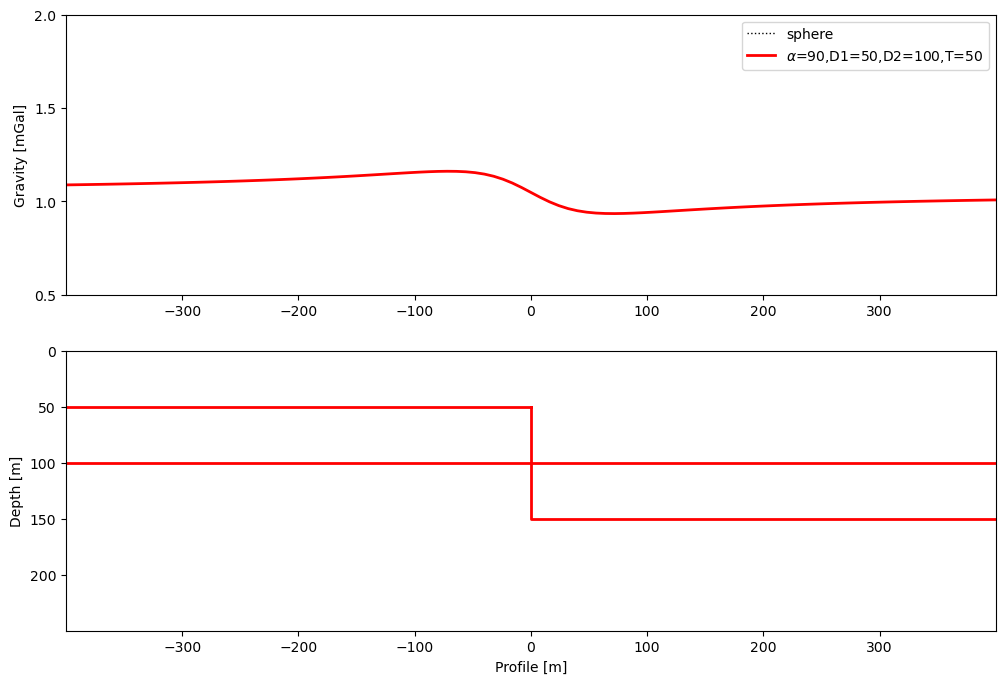

In [9]:
plot_fault(f1=True)

In [10]:
# call interactive module
w = dict(
f1=widgets.Checkbox(value=True,description='eins',continuous_update=False,disabled=False),
#a1=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f2=widgets.Checkbox(value=False,description='zwei',continuous_update=False,disabled=False),
f3=widgets.Checkbox(value=False,description='drei',continuous_update=False,disabled=False),
f4=widgets.Checkbox(value=False,description='vier',continuous_update=False,disabled=False),
f5=widgets.Checkbox(value=False,description='fuenf',continuous_update=False,disabled=False))
output = widgets.interactive_output(plot_fault, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

... done